In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df_healthy = pd.read_csv('healthy_data.csv')
df_PD_MCI_LBD = pd.read_csv('PD_MCI_LBD_data.csv')
df_PD = pd.read_csv('PD_data.csv')
df_AD_MCI = pd.read_csv('AD_MCI_data.csv')

In [3]:
df_AD_MCI.set_index('group', inplace=True)
df_healthy.set_index('group', inplace=True)
df_PD.set_index('group', inplace=True)
df_PD_MCI_LBD.set_index('group', inplace=True)

In [4]:
# Confirm the headers of all the dataframes are the samelbist(df_AD_MCI.columns) == list(df_healthy.columns) == list(df_PD.columns) == list(df_PD_MCI_LBD.columns)

In [5]:
list_columns = list(df_AD_MCI.columns)

In [6]:
def reversed_delimited_tuple(string,delimiter='|'):
    delimited_tuple = string.split(delimiter)
    reversed_tuple = delimited_tuple[::-1]
    return reversed_tuple

In [7]:
# List proteins by last short-name identifier used in column title
list_proteins = []
for protein_string in list_columns:
    list_proteins.append(reversed_delimited_tuple(protein_string)[0])

In [8]:
# Create dictionary of extended protein info : short identifier
dict_proteins = {}
for i in range(0,len(list_proteins)):
    dict_proteins[list_columns[i]] = list_proteins[i]

In [9]:
df_AD_MCI = df_AD_MCI.rename(columns=dict_proteins)
df_healthy = df_healthy.rename(columns=dict_proteins)
df_PD = df_PD.rename(columns=dict_proteins)
df_PD_MCI_LBD = df_PD_MCI_LBD.rename(columns=dict_proteins)

In [10]:
def gen_volcano_tuple(test_frame,control_frame):
    # Returns ['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value']
    datalist = []
    
    for protein in list_proteins:
        t_stat, p_stat = scipy.stats.ttest_ind(test_frame[protein],control_frame[protein],equal_var=False)
        datalist.append([protein,test_frame[protein].mean(), control_frame[protein].mean(),
                        np.log2(test_frame[protein].mean()/control_frame[protein].mean()),
                        float(t_stat), float(np.log10(p_stat))*-1])

    return datalist

In [11]:
AD_MCI_volcano_datalist = gen_volcano_tuple(df_AD_MCI,df_healthy)
PD_volcano_datalist = gen_volcano_tuple(df_PD,df_healthy)
PD_MCI_LBD_volcano_datalist = gen_volcano_tuple(df_PD_MCI_LBD,df_healthy)
PD_vs_MCI_volcano_datalist = gen_volcano_tuple(df_PD_MCI_LBD,df_PD)

In [12]:
df_volcano_AD_MCI = pd.DataFrame(data=AD_MCI_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])
df_volcano_PD = pd.DataFrame(data=PD_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])
df_volcano_PD_MCI = pd.DataFrame(data=PD_MCI_LBD_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])
df_volcano_PD_MCI_vs_PD = pd.DataFrame(data=PD_vs_MCI_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])

In [13]:
features = ['AK1C1', 'TAU', '1433G', 'SCUB1', 'FMOD', 'AMYP', 'CRIS3', 'MYDGF', 'RARR2', 'ATS8', 'PGK1', '1433Z', 'SV2A', 'TRH', 'GUAD', 'HV69D', 'CO7', 'SERC']

features_AD = df_volcano_AD_MCI[df_volcano_AD_MCI['protein'].isin(features)]
features_PD = df_volcano_PD[df_volcano_PD['protein'].isin(features)]
features_PD_MCI = df_volcano_PD_MCI[df_volcano_PD_MCI['protein'].isin(features)]

In [14]:
features_AD

,protein,avg_expr_cond,avg_expr_healthy,log2_FC,t_value,log10_p_value
34,HV69D,22.560142,22.708664,-0.009467,-0.632950,0.276837
189,PGK1,22.667798,22.410720,0.016455,6.176103,7.575802
326,AMYP,20.639088,20.495913,0.010043,2.164416,1.474140
437,TAU,19.831721,18.890155,0.070175,7.038025,8.923237
438,CO7,24.654424,24.671075,-0.000974,-0.338422,0.133209
509,AK1C1,17.956673,18.791682,-0.065574,-5.465681,6.397274
531,TRH,17.666906,17.623371,0.003559,0.300388,0.116573
670,CRIS3,17.537186,17.571561,-0.002825,-0.222727,0.083941
701,1433G,22.468784,22.045502,0.027438,7.246222,9.347692
708,1433Z,22.789951,22.362393,0.027323,7.425366,9.822912


In [15]:
features_PD

,protein,avg_expr_cond,avg_expr_healthy,log2_FC,t_value,log10_p_value
34,HV69D,22.346895,22.708664,-0.023168,-1.055235,0.526853
189,PGK1,22.317344,22.410720,-0.006024,-2.148717,1.441328
326,AMYP,20.473542,20.495913,-0.001576,-0.361147,0.143079
437,TAU,18.769956,18.890155,-0.009209,-1.383053,0.768025
438,CO7,24.777986,24.671075,0.006238,2.098592,1.396871
509,AK1C1,18.436805,18.791682,-0.027506,-1.778520,1.088941
531,TRH,17.838812,17.623371,0.017530,1.175608,0.610199
670,CRIS3,17.374613,17.571561,-0.016261,-0.981292,0.479864
701,1433G,22.048434,22.045502,0.000192,0.058351,0.020598
708,1433Z,22.372277,22.362393,0.000638,0.183815,0.068124


In [16]:
features_PD_MCI

,protein,avg_expr_cond,avg_expr_healthy,log2_FC,t_value,log10_p_value
34,HV69D,22.484824,22.708664,-0.014291,-0.773819,0.353731
189,PGK1,22.416713,22.410720,0.000386,0.115704,0.041738
326,AMYP,20.512389,20.495913,0.001159,0.250896,0.095382
437,TAU,18.841401,18.890155,-0.003728,-0.282262,0.108413
438,CO7,24.906206,24.671075,0.013685,4.269084,4.119510
509,AK1C1,18.061581,18.791682,-0.057170,-4.504978,4.519162
531,TRH,18.060619,17.623371,0.035357,2.735936,2.083072
670,CRIS3,17.976220,17.571561,0.032847,2.782884,2.162373
701,1433G,22.249649,22.045502,0.013298,3.578609,3.116247
708,1433Z,22.555833,22.362393,0.012426,3.213517,2.647423


In [17]:
AD_protein = np.array(features_AD['protein'])
AD_log2_FC = np.array(features_AD['log2_FC'])
AD_log10_p_values = np.array(features_AD['log10_p_value'])


AD_protein = ", ".join(["'{}'".format(val) for val in AD_protein])
AD_log2_FC = ', '.join(str(val) for val in AD_log2_FC)
AD_log10_p_values = ', '.join(str(val) for val in AD_log10_p_values)

print(AD_protein)
print(AD_log2_FC)
print(AD_log10_p_values)

'HV69D', 'PGK1', 'AMYP', 'TAU', 'CO7', 'AK1C1', 'TRH', 'CRIS3', '1433G', '1433Z', 'FMOD', 'SV2A', 'SCUB1', 'MYDGF', 'RARR2', 'ATS8', 'GUAD', 'SERC'
-0.009466682163603309, 0.016455249905063, 0.010043025224494795, 0.07017528302660155, -0.00097399661549537, -0.06557412581409057, 0.0035594828332827996, -0.0028250390031350965, 0.027437685771477687, 0.02732325957365813, -0.005359482508964814, -0.012438443864104587, 0.0026090818530010145, 0.008594800264731027, -0.005867068398198186, 0.011506887174580396, 0.03034686729002202, 0.021374375674042954
0.2768370365993581, 7.575801943266307, 1.4741404855576943, 8.923236726735672, 0.13320866582392643, 6.397274140030199, 0.11657282522515139, 0.0839408464962528, 9.347691768259953, 9.822911768687188, 0.9361413290053578, 0.605037342822215, 0.2975124272709599, 1.1976394979763434, 1.0705327429661768, 0.4695176871874562, 7.917944001374224, 8.007490038419329


In [18]:
labels_AD = {'col1': [-0.009466682163603309, 0.016455249905063, 0.010043025224494795, 0.07017528302660155, -0.00097399661549537, -0.06557412581409057, 0.0035594828332827996, -0.0028250390031350965, 0.027437685771477687, 0.02732325957365813, -0.005359482508964814, -0.012438443864104587, 0.0026090818530010145, 0.008594800264731027, -0.005867068398198186, 0.011506887174580396, 0.03034686729002202, 0.021374375674042954],
        'col2': [0.2768370365993581, 7.575801943266307, 1.4741404855576943, 8.923236726735672, 0.13320866582392643, 6.397274140030199, 0.11657282522515139, 0.0839408464962528, 9.347691768259953, 9.822911768687188, 0.9361413290053578, 0.605037342822215, 0.2975124272709599, 1.1976394979763434, 1.0705327429661768, 0.4695176871874562, 7.917944001374224, 8.007490038419329],
        'col3': ['HV69D', 'PGK1', 'AMYP', 'TAU', 'CO7', 'AK1C1', 'TRH', 'CRIS3', '1433G', '1433Z', 'FMOD', 'SV2A', 'SCUB1', 'MYDGF', 'RARR2', 'ATS8', 'GUAD', 'SERC']}
labels_AD = pd.DataFrame(labels_AD)

In [19]:
labels_AD

,col1,col2,col3
0,-0.009467,0.276837,HV69D
1,0.016455,7.575802,PGK1
2,0.010043,1.474140,AMYP
3,0.070175,8.923237,TAU
4,-0.000974,0.133209,CO7
5,-0.065574,6.397274,AK1C1
6,0.003559,0.116573,TRH
7,-0.002825,0.083941,CRIS3
8,0.027438,9.347692,1433G
9,0.027323,9.822912,1433Z


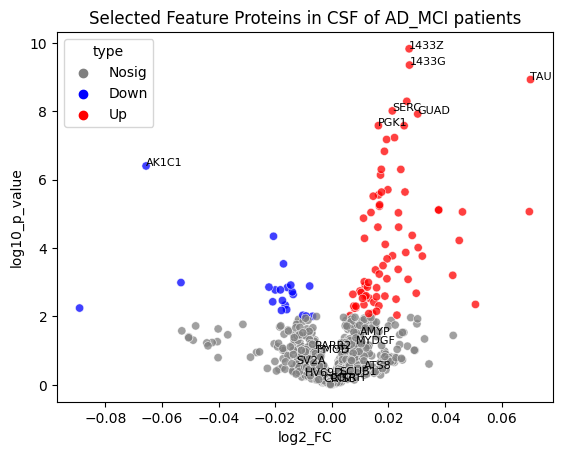

In [20]:
df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log2_FC>0)&(df_volcano_AD_MCI.log10_p_value>2),'type']='Up'
df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log2_FC<0)&(df_volcano_AD_MCI.log10_p_value>2),'type']='Down'
df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log10_p_value<=2),'type']='Nosig'

colors = ["grey","blue","red"]

ax=sns.scatterplot(x='log2_FC', y='log10_p_value',data=df_volcano_AD_MCI, hue='type', palette=colors, alpha=0.75)

ax.set_title("Selected Feature Proteins in CSF of AD_MCI patients")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

for i in range(labels_AD.shape[0]):
    ax.text(x=labels_AD.col1[i],y=labels_AD.col2[i],s=labels_AD.col3[i], size=8)

plt.savefig('plot1', bbox_inches='tight')

In [21]:
PD_protein = np.array(features_PD['protein'])
PD_log2_FC = np.array(features_PD['log2_FC'])
PD_log10_p_values = np.array(features_PD['log10_p_value'])


PD_protein = ", ".join(["'{}'".format(val) for val in PD_protein])
PD_log2_FC = ', '.join(str(val) for val in PD_log2_FC)
PD_log10_p_values = ', '.join(str(val) for val in PD_log10_p_values)

print(PD_protein)
print(PD_log2_FC)
print(PD_log10_p_values)

'HV69D', 'PGK1', 'AMYP', 'TAU', 'CO7', 'AK1C1', 'TRH', 'CRIS3', '1433G', '1433Z', 'FMOD', 'SV2A', 'SCUB1', 'MYDGF', 'RARR2', 'ATS8', 'GUAD', 'SERC'
-0.02316847126508739, -0.006023680332631618, -0.0015755212153104549, -0.00920930051558081, 0.006238374243442958, -0.027505561952093766, 0.017529626040257124, -0.016261470560477654, 0.0001918522233883537, 0.0006375206243892433, 0.007461356673480389, -0.026454285898984846, 0.010464629158061447, 0.01666712138048652, 0.008119189513298247, -0.03602701365466261, -0.0061960139765121795, 0.004406296485575753
0.5268526103856096, 1.4413281021615907, 0.14307920835885635, 0.7680249387944541, 1.396870690202114, 1.08894143860875, 0.6101988458025572, 0.4798641476010319, 0.02059842565374642, 0.06812423227011531, 1.3633992123306178, 1.4697823114050421, 1.7117873022906775, 2.1367204204706653, 1.967689961910157, 0.9469992878163941, 0.5777217347763337, 0.5152316521922456


In [22]:
labels_PD = {'col1': [-0.02316847126508739, -0.006023680332631618, -0.0015755212153104549, -0.00920930051558081, 0.006238374243442958, -0.027505561952093766, 0.017529626040257124, -0.016261470560477654, 0.0001918522233883537, 0.0006375206243892433, 0.007461356673480389, -0.026454285898984846, 0.010464629158061447, 0.01666712138048652, 0.008119189513298247, -0.03602701365466261, -0.0061960139765121795, 0.004406296485575753],
        'col2': [0.5268526103856096, 1.4413281021615907, 0.14307920835885635, 0.7680249387944541, 1.396870690202114, 1.08894143860875, 0.6101988458025572, 0.4798641476010319, 0.02059842565374642, 0.06812423227011531, 1.3633992123306178, 1.4697823114050421, 1.7117873022906775, 2.1367204204706653, 1.967689961910157, 0.9469992878163941, 0.5777217347763337, 0.5152316521922456],
        'col3': ['HV69D', 'PGK1', 'AMYP', 'TAU', 'CO7', 'AK1C1', 'TRH', 'CRIS3', '1433G', '1433Z', 'FMOD', 'SV2A', 'SCUB1', 'MYDGF', 'RARR2', 'ATS8', 'GUAD', 'SERC']}
labels_PD = pd.DataFrame(labels_PD)

In [23]:
labels_PD

,col1,col2,col3
0,-0.023168,0.526853,HV69D
1,-0.006024,1.441328,PGK1
2,-0.001576,0.143079,AMYP
3,-0.009209,0.768025,TAU
4,0.006238,1.396871,CO7
5,-0.027506,1.088941,AK1C1
6,0.017530,0.610199,TRH
7,-0.016261,0.479864,CRIS3
8,0.000192,0.020598,1433G
9,0.000638,0.068124,1433Z


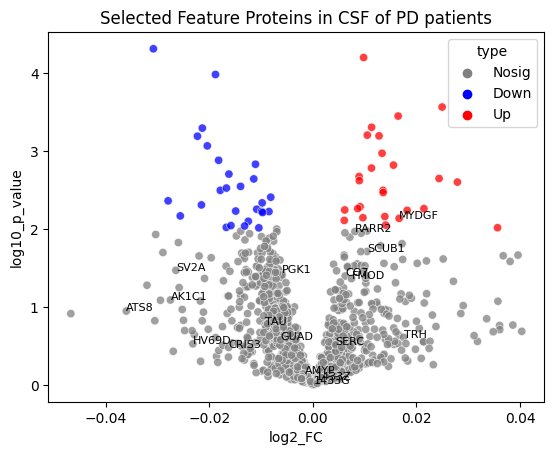

In [24]:
df_volcano_PD.loc[(df_volcano_PD.log2_FC>0)&(df_volcano_PD.log10_p_value>2),'type']='Up'
df_volcano_PD.loc[(df_volcano_PD.log2_FC<0)&(df_volcano_PD.log10_p_value>2),'type']='Down'
df_volcano_PD.loc[(df_volcano_PD.log10_p_value<=2),'type']='Nosig'

colors = ["grey","blue","red"]

ax=sns.scatterplot(x='log2_FC', y='log10_p_value',data=df_volcano_PD, hue='type', palette=colors, alpha=0.75)

ax.set_title("Selected Feature Proteins in CSF of PD patients")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

for i in range(labels_PD.shape[0]):
    ax.text(x=labels_PD.col1[i],y=labels_PD.col2[i],s=labels_PD.col3[i], size=8)

plt.savefig('plot2', bbox_inches='tight')

In [25]:
PD_MCI_protein = np.array(features_PD_MCI['protein'])
PD_MCI_log2_FC = np.array(features_PD_MCI['log2_FC'])
PD_MCI_log10_p_values = np.array(features_PD_MCI['log10_p_value'])


PD_MCI_protein = ", ".join(["'{}'".format(val) for val in PD_MCI_protein])
PD_MCI_log2_FC = ', '.join(str(val) for val in PD_MCI_log2_FC)
PD_MCI_log10_p_values = ', '.join(str(val) for val in PD_MCI_log10_p_values)

print(PD_MCI_protein)
print(PD_MCI_log2_FC)
print(PD_MCI_log10_p_values)

'HV69D', 'PGK1', 'AMYP', 'TAU', 'CO7', 'AK1C1', 'TRH', 'CRIS3', '1433G', '1433Z', 'FMOD', 'SV2A', 'SCUB1', 'MYDGF', 'RARR2', 'ATS8', 'GUAD', 'SERC'
-0.014291283280611848, 0.0003857560994420979, 0.0011592715630593128, -0.003728336914803991, 0.013684687031671921, -0.05717004168257422, 0.03535739544273987, 0.03284731817048297, 0.01329823395461466, 0.01242597391336761, 0.008248140175046364, 0.006782086059058155, 0.01794081605089329, 0.021519944320707154, 0.00795023137133519, -0.019462931406746476, -0.006470787250962563, 0.001968573094274665
0.3537309382277656, 0.04173823727310762, 0.09538200869170131, 0.10841323367551713, 4.1195104382804795, 4.519161941886108, 2.0830722133213695, 2.1623725866071135, 3.1162472537791173, 2.6474232211839595, 1.305248305634214, 0.3170298496112794, 3.060545517110803, 3.098229090762341, 1.235148857476687, 0.8376832984627005, 0.5065745247984059, 0.22219660844393327


In [26]:
labels_PD_MCI = {'col1': [-0.014291283280611848, 0.0003857560994420979, 0.0011592715630593128, -0.003728336914803991, 0.013684687031671921, -0.05717004168257422, 0.03535739544273987, 0.03284731817048297, 0.01329823395461466, 0.01242597391336761, 0.008248140175046364, 0.006782086059058155, 0.01794081605089329, 0.021519944320707154, 0.00795023137133519, -0.019462931406746476, -0.006470787250962563, 0.001968573094274665],
        'col2': [0.3537309382277656, 0.04173823727310762, 0.09538200869170131, 0.10841323367551713, 4.1195104382804795, 4.519161941886108, 2.0830722133213695, 2.1623725866071135, 3.1162472537791173, 2.6474232211839595, 1.305248305634214, 0.3170298496112794, 3.060545517110803, 3.098229090762341, 1.235148857476687, 0.8376832984627005, 0.5065745247984059, 0.22219660844393327],
        'col3': ['HV69D', 'PGK1', 'AMYP', 'TAU', 'CO7', 'AK1C1', 'TRH', 'CRIS3', '1433G', '1433Z', 'FMOD', 'SV2A', 'SCUB1', 'MYDGF', 'RARR2', 'ATS8', 'GUAD', 'SERC']}
labels_PD_MCI = pd.DataFrame(labels_PD_MCI)

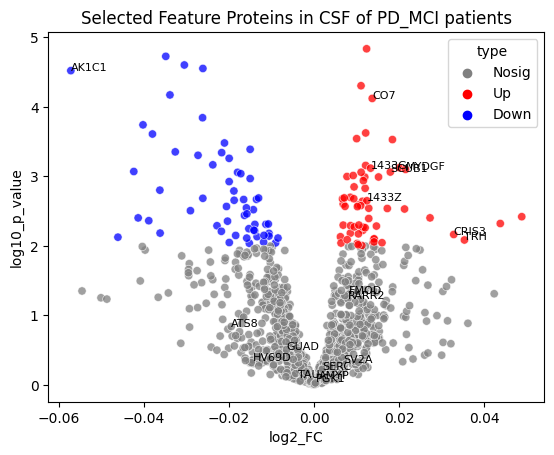

In [27]:
df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log2_FC>0)&(df_volcano_PD_MCI.log10_p_value>2),'type']='Up'
df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log2_FC<0)&(df_volcano_PD_MCI.log10_p_value>2),'type']='Down'
df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log10_p_value<=2),'type']='Nosig'

colors = ["grey","red","blue"]

ax=sns.scatterplot(x='log2_FC', y='log10_p_value',data=df_volcano_PD_MCI, hue='type', palette=colors, alpha=0.75)

ax.set_title("Selected Feature Proteins in CSF of PD_MCI patients")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")


for i in range(labels_PD_MCI.shape[0]):
    ax.text(x=labels_PD_MCI.col1[i],y=labels_PD_MCI.col2[i],s=labels_PD_MCI.col3[i], size=8)

plt.savefig('plot3', bbox_inches='tight')

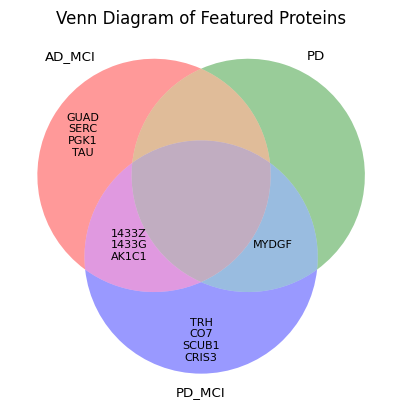

In [28]:
### import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
AD = set(['TAU', 'PGK1', 'GUAD', 'SERC'])
PD = set([])
PD_MCI = set(['CO7', 'TRH', 'CRIS3', 'SCUB1'])
AD_PD = set([])
AD_PD_MCI = set(['AK1C1', '1433G', '1433Z'])
PD_PD_MCI = set(['MYDGF'])
AD_PD_PD_MCI = set([''])

font1 = {'family':'DejaVu Sans', 'size':12} # use for title
font2 = {'family': 'DejaVu Sans', 'size': 8} # use for labels
plt.rc('font', **font2) # sets the default font 

# Create an empty Venn diagram with three circles
venn = venn3(subsets=(3, 3, 3, 3, 3, 3, 3), set_labels=('A', 'B', 'C'))

# Add circle labels
venn.get_label_by_id('A').set_text('AD_MCI')
venn.get_label_by_id('B').set_text('PD')
venn.get_label_by_id('C').set_text('PD_MCI')

# Add title
plt.title('Venn Diagram of Featured Proteins', fontdict=font1)

venn.get_label_by_id('100').set_text('\n'.join(AD))
venn.get_label_by_id('010').set_text('\n'.join(PD))
venn.get_label_by_id('001').set_text('\n'.join(PD_MCI))
venn.get_label_by_id('110').set_text('\n'.join(AD_PD))
venn.get_label_by_id('101').set_text('\n'.join(AD_PD_MCI))
venn.get_label_by_id('011').set_text('\n'.join(PD_PD_MCI))
venn.get_label_by_id('111').set_text('\n'.join(AD_PD_PD_MCI))

# Display diagram
plt.savefig('venn_diagram.png', bbox_inches='tight')
plt.show()